# Plot bike usage on map

In [1]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (8,6)

import contextlib
import urllib
from lxml import etree
import datetime
import pandas as pd
import time
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Import existing bikedata file from csv

In [2]:
bikedata = pd.DataFrame.from_csv('bikelog_100515.csv')
bikedata.head()

,Colleges of the Fenway,Tremont St. at Berkeley St.,Northeastern U / North Parking Lot,Cambridge St. at Joy St.,Fan Pier,Union Square - Brighton Ave. at Cambridge St.,Agganis Arena - 925 Comm Ave.,B.U. Central - 725 Comm. Ave.,Longwood Ave / Binney St,Ruggles Station / Columbus Ave.,...,Alewife Station at Russell Field,EF - North Point Park,Rindge Avenue - O'Neill Library,Harvard University Transportation Services - 175 North Harvard St,State Street at Channel Center,John F Fitzgerald - Surface Road at India Street,Ink Block,Wentworth Institute of Technology,Seaver Street at Humbolt Ave,West Broadway at D Street
2015-10-05 07:24:24.015,2,4,8,3,8,13,15,5,13,4,...,18,13,8,10,11,12,11,3,3,8
2015-10-05 07:48:24.096,2,0,8,0,2,13,15,6,14,2,...,18,13,6,10,10,13,9,3,2,8
2015-10-05 08:12:24.176,3,1,9,1,1,13,15,8,14,3,...,18,12,6,6,10,11,7,3,2,8
2015-10-05 08:36:24.285,5,0,10,3,5,12,17,8,11,1,...,20,14,6,3,13,15,7,3,2,8
2015-10-05 09:00:24.373,9,1,11,4,9,11,17,9,9,2,...,21,19,4,2,16,18,4,4,1,8


In [3]:
bikedata.tail()

,Colleges of the Fenway,Tremont St. at Berkeley St.,Northeastern U / North Parking Lot,Cambridge St. at Joy St.,Fan Pier,Union Square - Brighton Ave. at Cambridge St.,Agganis Arena - 925 Comm Ave.,B.U. Central - 725 Comm. Ave.,Longwood Ave / Binney St,Ruggles Station / Columbus Ave.,...,Alewife Station at Russell Field,EF - North Point Park,Rindge Avenue - O'Neill Library,Harvard University Transportation Services - 175 North Harvard St,State Street at Channel Center,John F Fitzgerald - Surface Road at India Street,Ink Block,Wentworth Institute of Technology,Seaver Street at Humbolt Ave,West Broadway at D Street
2015-10-06 05:24:29.995,2,13,8,1,0,13,6,2,0,8,...,11,11,6,5,0,2,13,6,NaN,9
2015-10-06 05:48:30.091,2,11,8,1,0,13,7,2,2,7,...,11,11,6,5,0,2,13,6,NaN,9
2015-10-06 06:12:30.193,1,10,8,1,0,13,7,2,4,7,...,12,11,5,4,0,2,13,6,NaN,9
2015-10-06 06:36:30.277,1,10,8,1,0,13,8,2,8,9,...,12,10,5,4,0,3,14,6,NaN,9
2015-10-06 07:00:30.371,1,7,8,4,1,13,7,2,8,10,...,12,10,5,4,1,4,12,6,NaN,9


### Total number of available bikes

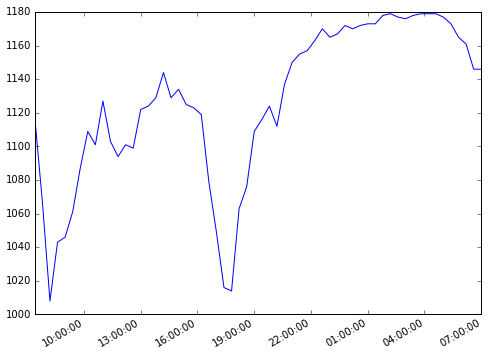

In [11]:
bikedata.sum(1).plot()

As expected, see morning and evening rush hour peaks, a smaller peak at lunchtime, and fewest bikes in use overnight.

### "Harvard" stations

In [13]:
bikedata.iloc[:,bikedata.columns.str.contains("Harvard")].head()

,Harvard Real Estate - Brighton Mills - 370 Western Ave,Harvard University Housing - 111 Western Ave. at Soldiers Field Park,Harvard Kennedy School at Bennett St / Eliot St,Harvard Square at Brattle St / Eliot St,Harvard Square at Mass Ave/ Dunster,Harvard University Housing - 115 Putnam Ave at Peabody Terrace,Harvard Law School at Mass Ave / Jarvis St,Harvard University River Houses - DeWolfe St at Grant St,JFK Crossing at Harvard St. / Thorndike St.,Harvard University Radcliffe Quadrangle at Shepard St / Garden St,Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St,Harvard University Gund Hall at Quincy St / Kirkland S,Harvard University Transportation Services - 175 North Harvard St
2015-10-05 07:24:24.015,11,7,8,5,6,0,0,4,8,12,4,1,10
2015-10-05 07:48:24.096,11,7,7,6,6,1,0,2,6,12,6,0,10
2015-10-05 08:12:24.176,10,9,8,6,7,1,3,1,10,11,6,2,6
2015-10-05 08:36:24.285,10,9,13,8,7,0,3,0,10,11,7,2,3
2015-10-05 09:00:24.373,9,9,17,10,9,0,4,0,8,10,9,4,2


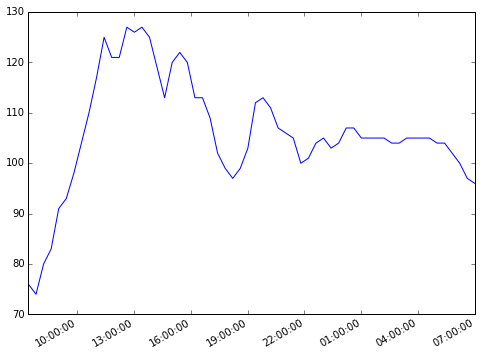

In [15]:
bikedata.iloc[:,bikedata.columns.str.contains("Harvard")].sum(axis=1).plot()

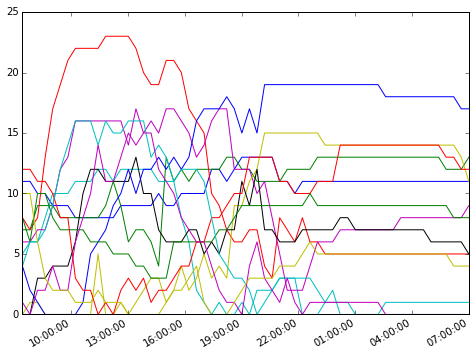

In [14]:
bikedata.iloc[:,bikedata.columns.str.contains("Harvard")].plot(legend=False)

### Mean available bikes

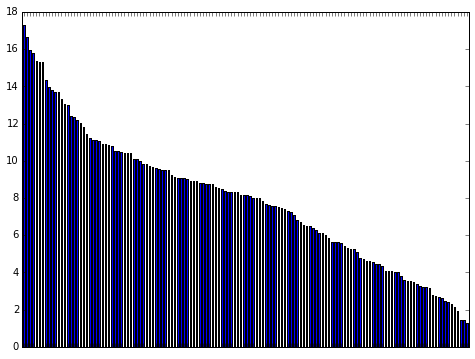

In [27]:
bikedata.mean().order(ascending=False).plot(kind="bar")
plt.tick_params(labelbottom='off')

or a histogram

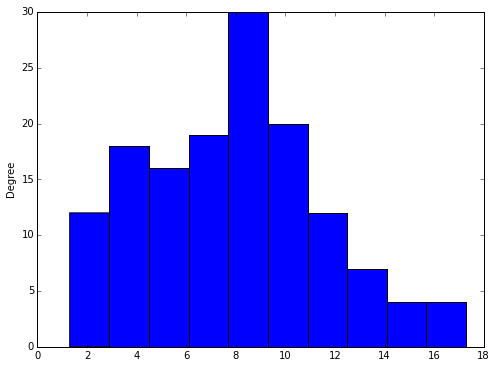

In [29]:
bikedata.mean().order(ascending=False).plot(kind="hist")

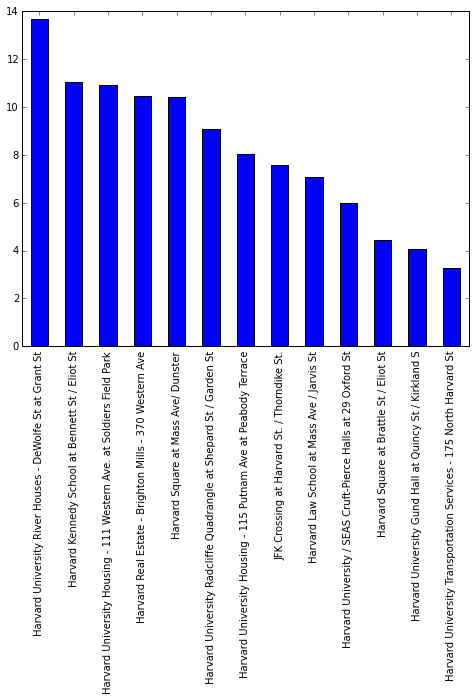

In [28]:
bikedata.iloc[:,bikedata.columns.str.contains("Harvard")].mean().order(ascending=False).plot(kind="bar")

### Single station

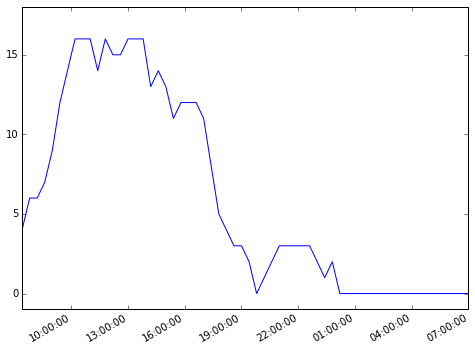

In [18]:
bikedata['Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St'].plot(ylim = [-1, 18])

### Change in number of bikes at each timestep

In [30]:
bikedelta = bikedata - bikedata.shift(1)

In [34]:
bikedelta.head()

,Colleges of the Fenway,Tremont St. at Berkeley St.,Northeastern U / North Parking Lot,Cambridge St. at Joy St.,Fan Pier,Union Square - Brighton Ave. at Cambridge St.,Agganis Arena - 925 Comm Ave.,B.U. Central - 725 Comm. Ave.,Longwood Ave / Binney St,Ruggles Station / Columbus Ave.,...,Alewife Station at Russell Field,EF - North Point Park,Rindge Avenue - O'Neill Library,Harvard University Transportation Services - 175 North Harvard St,State Street at Channel Center,John F Fitzgerald - Surface Road at India Street,Ink Block,Wentworth Institute of Technology,Seaver Street at Humbolt Ave,West Broadway at D Street
2015-10-05 07:24:24.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-05 07:48:24.096,0,-4,0,-3,-6,0,0,1,1,-2,...,0,0,-2,0,-1,1,-2,0,-1,0
2015-10-05 08:12:24.176,1,1,1,1,-1,0,0,2,0,1,...,0,-1,0,-4,0,-2,-2,0,0,0
2015-10-05 08:36:24.285,2,-1,1,2,4,-1,2,0,-3,-2,...,2,2,0,-3,3,4,0,0,0,0
2015-10-05 09:00:24.373,4,1,1,1,4,-1,0,1,-2,1,...,1,5,-2,-1,3,3,-3,1,-1,0


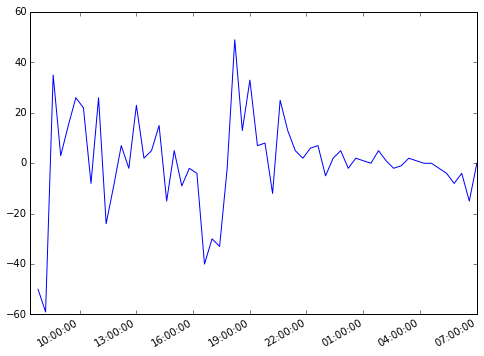

In [52]:
bikedelta.sum(1).plot()

Stacked bar plot shows overall traffic volume with time:

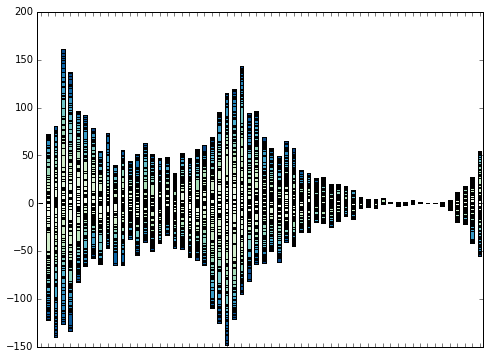

In [72]:
bikedelta.plot(kind="bar", stacked=True, colormap="GnBu", legend=False)
plt.tick_params(labelbottom='off')

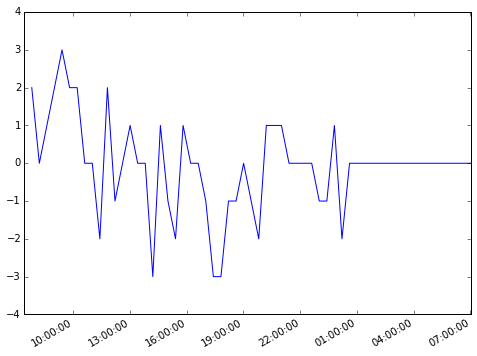

In [33]:
bikedelta['Harvard University / SEAS Cruft-Pierce Halls at 29 Oxford St'].plot(ylim=[-4,4])

Identify station with max delta at each time

In [51]:
bikedeltamax = pd.concat([bikedelta.idxmax(axis=1), bikedelta.max(axis=1)], axis=1)
bikedeltamax

,0,1
2015-10-05 07:24:24.015,NaN,NaN
2015-10-05 07:48:24.096,Congress / Sleeper,8
2015-10-05 08:12:24.176,HMS / HSPH - Ave. Louis Pasteur at Longwood Ave.,8
2015-10-05 08:36:24.285,TD Garden - Causeway at Portal Park #2,12
2015-10-05 09:00:24.373,MIT Stata Center at Vassar St / Main St,9
2015-10-05 09:24:24.461,South Station - 700 Atlantic Ave.,10
2015-10-05 09:48:24.548,TD Garden - Causeway at Portal Park #2,10
2015-10-05 10:12:24.637,Washington St. at Waltham St.,9
2015-10-05 10:36:24.728,Washington St. at Rutland St.,8
2015-10-05 11:00:24.844,Charlestown - Warren St at Chelsea St,7


In [90]:
100%10

0

In [81]:
type(bikedeltamax.iloc[1:,0])

pandas.core.series.Series